# PCA Demonstration in Python

- For this demonstration, we begin with a very popular machine learning dataset - 'Iris'. In the next few segments, we will learn the necessary steps needed to perform PCA on a dataset and then appreciate how it helps in visualising your data that contains more than two dimensions.

### What we will be doing
#### Steps before doing PCA
- 1. After basic data cleaning procedures, standardise the data
-  2. Once standardisation has been done, we can go ahead and perform PCA on the dataset. For doing this we import the necessary libraries from sklearn.decomposition.
- 3. Instantiate the PCA function and set the random state to some specific number so that we get the same result every time you execute that code.
- 4. Perform PCA on the dataset by using the pca.fit function. 
- 5. The Principal Components can be accessed using the following code:
    - pca.components_
- Executing the above code will give the list of Principal components of the original dataset. They'll be of the same number as the original variables in the dataset
#### Steps after doing PCA
- 1. First, we see how much variance is being explained by each Principal Component using the following code:
 - pca.explained_variance_ratio_
- 2. Using a Scree-Plot

#### Dimensionality Reduction.
- Finally we will go for dimensionality reduction.

In [1]:
## importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
## filtering warnings
import warnings
warnings.filterwarnings('ignore')

#### Importing the dataset and initial look at the data

In [2]:
data = pd.read_csv('Iris.csv')
data.head()

,sepal length,sepal width,petal length,petal width,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


- We basically want to focus on the numeric columns for PCA
- So we will make a separate dataset with only the numeric columns

In [3]:
y = data[['iris']]
y.shape

(150, 1)

In [4]:
X = data.drop('iris',axis = 1)
X.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
## checking null and dtypes
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


- No null values all datatypes are in order

In [6]:
## checking the spread
X.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


- We can see that sepal lenght has a much higher mean and other metrics than the other varaibales.
- Hence scaling is reqiured.

#### Scaling

In [7]:
# importing libraries
from sklearn.preprocessing import StandardScaler

In [9]:
z = X.copy()
z.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
## instantiating scaler object
scaler = StandardScaler()
## fitting into the object
x = scaler.fit_transform(z)

In [16]:
## since x is an array, we cant use head(), we will check records using indexing
x[0:5,0:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

- So there a orignally four columns that we will be subjecting to PCA

# Applying PCA on the data

In [17]:
## importing libraries
from sklearn.decomposition import PCA

In [18]:
##instantiating object
pca = PCA(random_state=42)
## fitting into pca
pca.fit(x)

PCA(random_state=42)

In [19]:
## checking pca components
pca.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577],
       [-0.72101681,  0.24203288,  0.14089226,  0.6338014 ],
       [-0.26199559,  0.12413481,  0.80115427, -0.52354627]])

- The principal components are of the same number as that of the original variables with each Principal Component explaining some amount of variance of the entire dataset.
- This information would enable us to know which Principal Components to keep and which to discard to perform Dimensionality Reduction.

#### Checking the strenght of each of the componets

In [20]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

In [21]:
len(pca.explained_variance_ratio_)

4

- The first component explains 72.77% of information
- The second component explains 23% of information
- The third component explains 3.68% of information
- The fourth component explains .5% of information
- Therefore the first component and the second component together explain about 95% of infomation so we could drop the third and the fourth components.

- So as we can see, the first PC, i.e. Principal Component 1([0.52 -0.26 0.58 0.56]) explains the maximum information in the dataset followed by PC2 at 23% and PC3 at 3.6%.
- In general, when we perform PCA, all the Principal Components are formed in decreasing order of the information that they explain.
- Therefore, the first principal component will always explain the highest variance, followed by the second principal component and so on.
- This order helps us in our dimensionality reduction exercise, as now we know which directions are more important than the others.

### Plotting the variances using Scree Plot
- We will make bar plot
   - y-axis will be pca.explained_variance_ratio_
   - x-axis will track the lenght of pca.explained_variance_ratio_ to provide the widht of bars on barplot

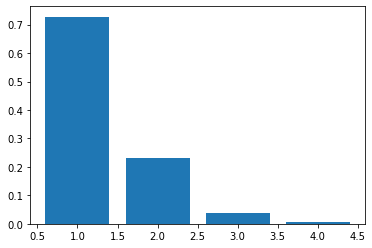

In [22]:
## plotting
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)
plt.show()

- The first component and the second component together explain a lot of variance

- Now, in our dataset, we only had 4 columns and equivalently 4 PCs. Therefore it was easy to visualise the amount of variance explained by them using a simple bar plot and then we're able to make a call as to how much variance to keep in the data. 

- For example, using the table above, you only need 2 principal components or 2 directions (PC1 and PC2) to explain more than 95% of the variation in the data.

- But what happens when there are hundreds of columns? Using the above process would be cumbersome since we'd need to look at all the PCs and keep adding their variances up to find the total variance captured.

### Scree-Plot

-An elegant solution here would be to simply add a plot of "Cumulative variance explained chart". Here against each number of components, we have the total variance explained by all the components till then.

- So for example, cumulative variance explained by the top 2 principal components is the sum of their individual variances, given by 72.8 +23 =95.8 %. Similarly, you can continue this for 3 and 4 components.

- If we plot the number of components on the X-axis and the total variance explained on the Y-axis, the resultant plot is also known as a Scree-Plot.

#### cumulative varinace
- helps determine variance percentages when we have 100's of columns

In [23]:
## we will use np.cumsum which returns the cumulative sum of the elements along a given axis.
var_cmu = np.cumsum(pca.explained_variance_ratio_)
var_cmu

array([0.72770452, 0.95800975, 0.99484807, 1.        ])

- As we can see, the function returns cumulative percentages for all the principal components

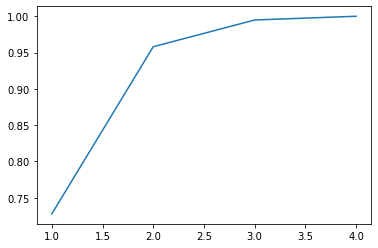

In [25]:
## skree-plot
## x-axis = range of len of var_cmu
## y-axis = var_cmu
plt.plot(range(1,len(var_cmu)+1), var_cmu)
plt.show()

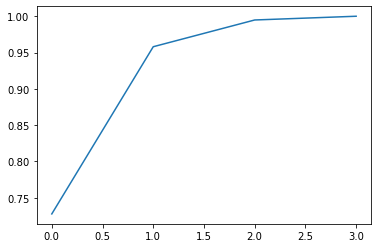

In [44]:
## simpler code
plt.plot(var_cmu)
plt.show()

- We can again see that the first two components cumulatively explain 95% variance.
- Good case for dropping the other two componets

### PCA with 2 components

- 1.) Choosing the required number of components

   - From the scree plot that you saw previously, we decided to keep ~95% of the information in the data that we have and for that, we need only 2 components. 
   - Hence we instantiate a new PCA function with the number of components as 2. This function will perform the dimensionality reduction on our dataset and reduce the number of columns from 4 to 2.
    - pc2 = PCA(n_components=2, random_state=42)
    
- 2.) Perform Dimensionality Reduction on our dataset.

  - Now we simply transform the original dataset to the new one where the columns are given by the Principal Components. 
  - Here we've finally performed the dimensionality reduction on the dataset by reducing the number of columns from 4 to 2 and still retain 95% of the information. 
  - The code that we wil use to perform the same step is as follows:
     - newdata = pc2.fit_transform(x)

- 3) Data Visualisation using the PCs
   - Now that we  would have the data in 2 dimensions, it will be easier for us to visualise the same using a scatterplot or some other chart. 
   - We will be plotting the observations that we have and dividing them on the basis of the species that they belong to.

#### Choosing the required number of components

In [26]:
## making pca for 2 components
pca2 = PCA(n_components=2,random_state=42)
## fitting into pca2
pca2.fit(x)

PCA(n_components=2, random_state=42)

#### Perform Dimensionality Reduction on our dataset.

In [27]:
##performing dimensionality reduction
newdata = pca2.fit_transform(x)
## checking shape
newdata.shape

(150, 2)

#### Data Visualisation using the PCs
- First, we will make a dataframe for beter representation
- Then make pair-plots

###  Making  Dataframe

In [28]:
df = pd.DataFrame(newdata,columns=['PCA1','PCA2'])
df.head()

,PCA1,PCA2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [30]:
## concatenating y i.e iris to df
df_final = pd.concat([df,y],axis=1)
df_final.head()

,PCA1,PCA2,iris
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


### Plotting the data 

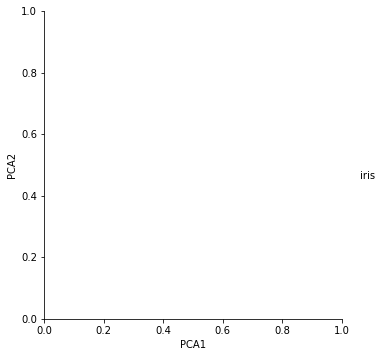

In [43]:
sns.pairplot(data=df_final,x_vars=['PCA1'],y_vars=['PCA2'],hue='iris',size=5,diag_kind='kde')
plt.show()

### Upgrad questions

In [49]:
df = pd.read_csv('Ratings.csv')
df.head()

,B1,B2,B3,B4,B5
0,1,0,4,0,3
1,2,3,4,3,2
2,3,3,2,4,2
3,4,4,3,5,4
4,5,1,4,2,2


In [50]:
from sklearn.decomposition import PCA

In [51]:
## instantiating
pca = PCA(random_state=42)
## fitting
pca.fit(df)


PCA(random_state=42)

In [52]:
pca.components_

array([[-0.31118649, -0.48101502,  0.35622281, -0.69199674, -0.25696953],
       [ 0.90672615, -0.31113879,  0.25507174, -0.09225738,  0.08641369],
       [-0.12857449, -0.38163517, -0.34923551, -0.16484744,  0.82986931],
       [ 0.1452065 , -0.34290409, -0.79235694, -0.05662208, -0.47989194],
       [-0.20831306, -0.63920934,  0.24134777,  0.69444104, -0.08671783]])

In [53]:
pca.explained_variance_ratio_

array([6.51886873e-01, 1.52836342e-01, 1.30717403e-01, 6.43810220e-02,
       1.78359842e-04])

In [55]:
pca.explained_variance_ratio_

array([6.51886873e-01, 1.52836342e-01, 1.30717403e-01, 6.43810220e-02,
       1.78359842e-04])

In [56]:
pca.fit_transform(df)

array([[ 4.32763697, -0.86510265,  1.26638799,  0.0192282 , -0.02607712],
       [ 0.75438474, -1.25497871, -1.33150365, -0.55425185,  0.01802273],
       [-0.96124411, -0.95065343, -0.92645456,  1.11904645,  0.02145516],
       [-2.60315862, -0.01942434, -0.29100855, -0.88741404, -0.0637141 ],
       [ 1.47485205,  2.1797347 , -0.78910935,  0.6237979 , -0.0229388 ],
       [ 0.09908771,  1.04243975,  0.45272116, -0.88071865,  0.06717028],
       [-3.09155875, -0.13201534,  1.61896695,  0.56031199,  0.00608186]])

In [57]:
pca.explained_variance_ratio_

array([6.51886873e-01, 1.52836342e-01, 1.30717403e-01, 6.43810220e-02,
       1.78359842e-04])